In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import os
import sys
import pickle
# Add the function directory to the path
sys.path.append('/home/jiarong/research/postprocessing/functions/')
from Slicing import Slicing
from fio import readin
from TurStat import TurStat
from tqdm import tqdm

df.iloc[[0, 1]]  
df.iloc[:3]  
df.iloc[lambda x: x.index % 2 == 0]  
About display precision in pandas  
https://stackoverflow.com/questions/43217916/pandas-data-precision

In [3]:
pd.set_option("display.precision", 8)
os.chdir('/home/jiarong/research/projects/turbulence/preliminary_cluster/RE_compare/RE4000start10end250')
(fieldset, tset, ptnum) = pickle.load( open( "ensemble", "rb" ) )

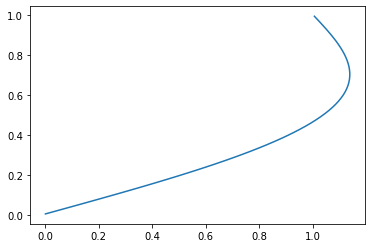

In [3]:
Stat1 = TurStat(fieldset, tset)
Stat1.ensemble_aver()
Stat1.field_en_aver = Stat1.field_en_aver.sort_values(by = ['y'])
from Slicing import Slicing
slicer_en_aver = Slicing(Stat1.field_en_aver, dimension = 3)

# Still needs testing
slicer_en_aver.get_grid_set('y')
ux_aver = np.zeros(len(slicer_en_aver.grid_set))
for j, y in enumerate(slicer_en_aver.grid_set):
    ux_aver[j], fluc, number = slicer_en_aver.statistics('y', y, header = 'u.x')
#     ux_aver[j], __, __ = filename.rpartition('.')
plt.plot(ux_aver, slicer_en_aver.grid_set)

In [38]:
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('font', size=18)
rc('axes', titlesize=20)

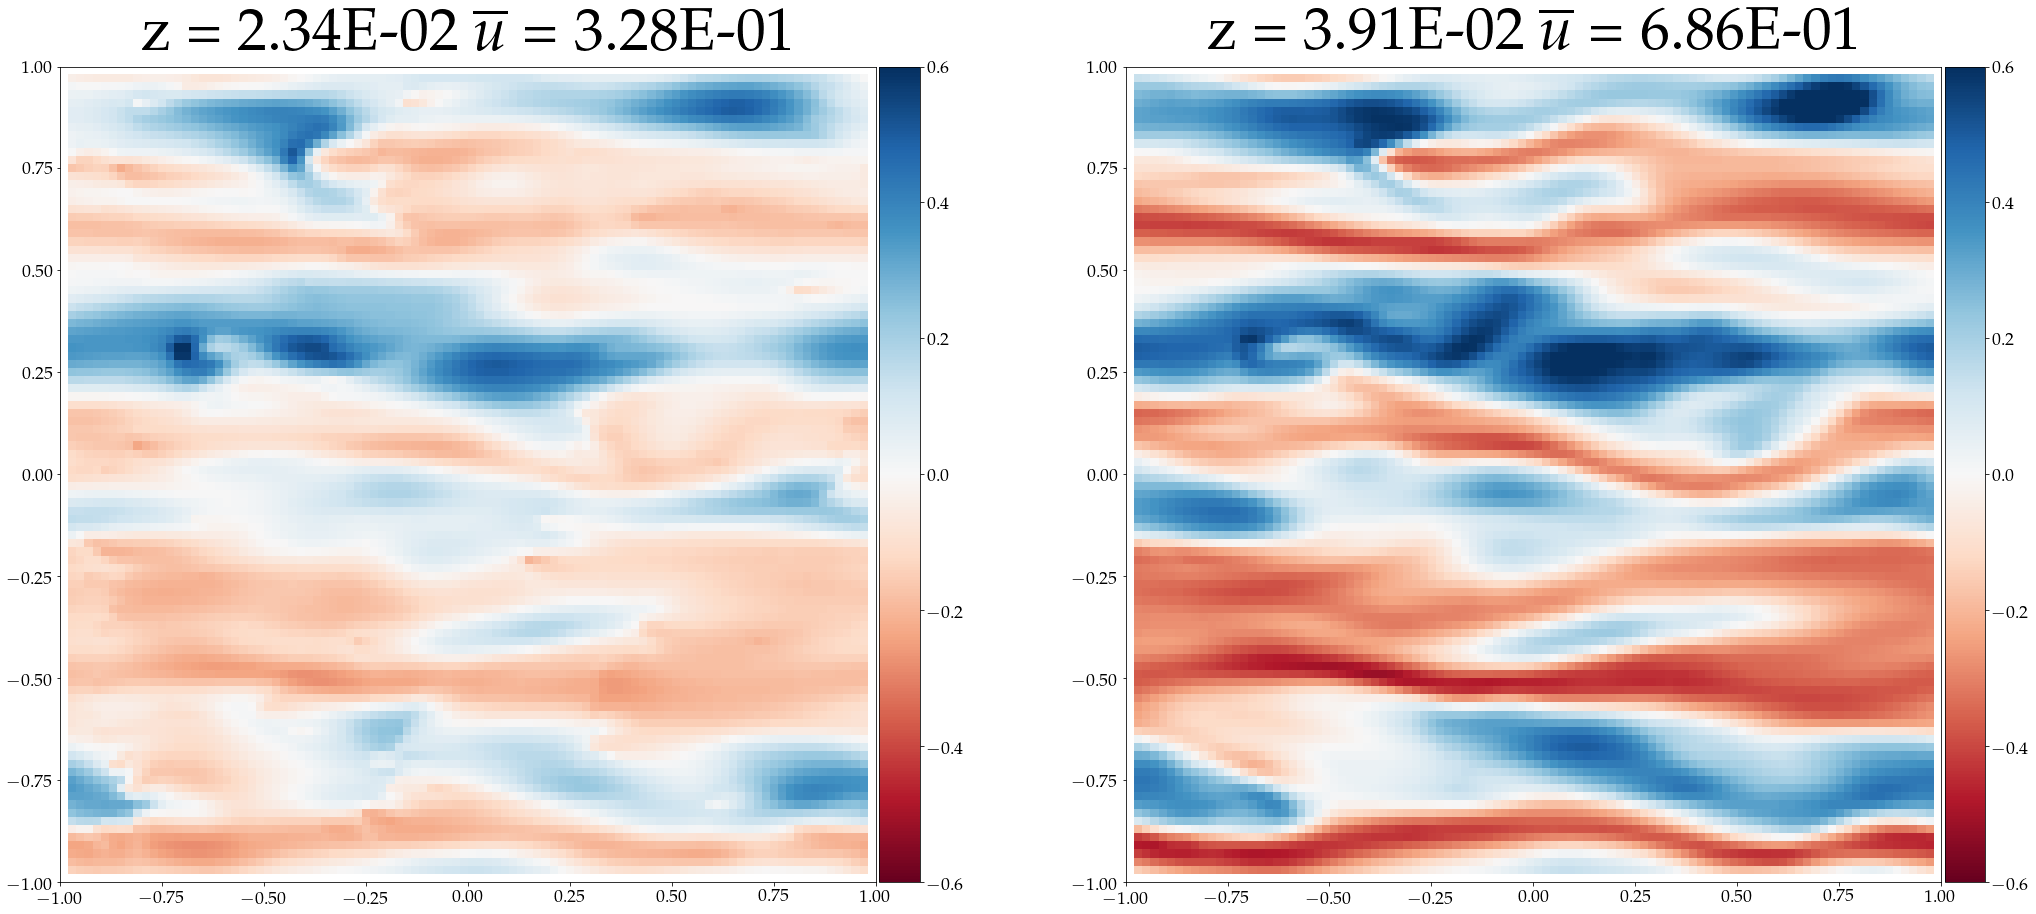

In [42]:
# Test plotting fluctuation
os.chdir('/home/jiarong/research/projects/turbulence/preliminary_cluster/stopforcing')
filename = './field_direct%g' % 140
field = readin(filename)
grid = (1,2)
fig1, ax1 = plt.subplots(ncols=grid[1], nrows=grid[0], figsize = [35,15])
ax = ax1.flatten()
field = field.sort_values(by = ['y'])
slicer = Slicing(field, dimension = 3)
slicer.get_grid_set('y')
y_set = slicer.grid_set
for i, y in enumerate(y_set):
    if (i==1) or (i==2) :
        slicer.slice_plot(ax[i-1], 'y', y, header = 'u.x', fluc = True, fixedrange = [-0.6, 0.6], plotscatter = False)
        (aver,fluc,number) = slicer.statistics('y', y, header = 'u.x')
        ax[i-1].set_title('z = %1.2E' %y + r'   $\overline{u}$ = %1.2E' %aver, fontsize = 60)

100%|██████████| 4/4 [00:11<00:00,  2.83s/it]


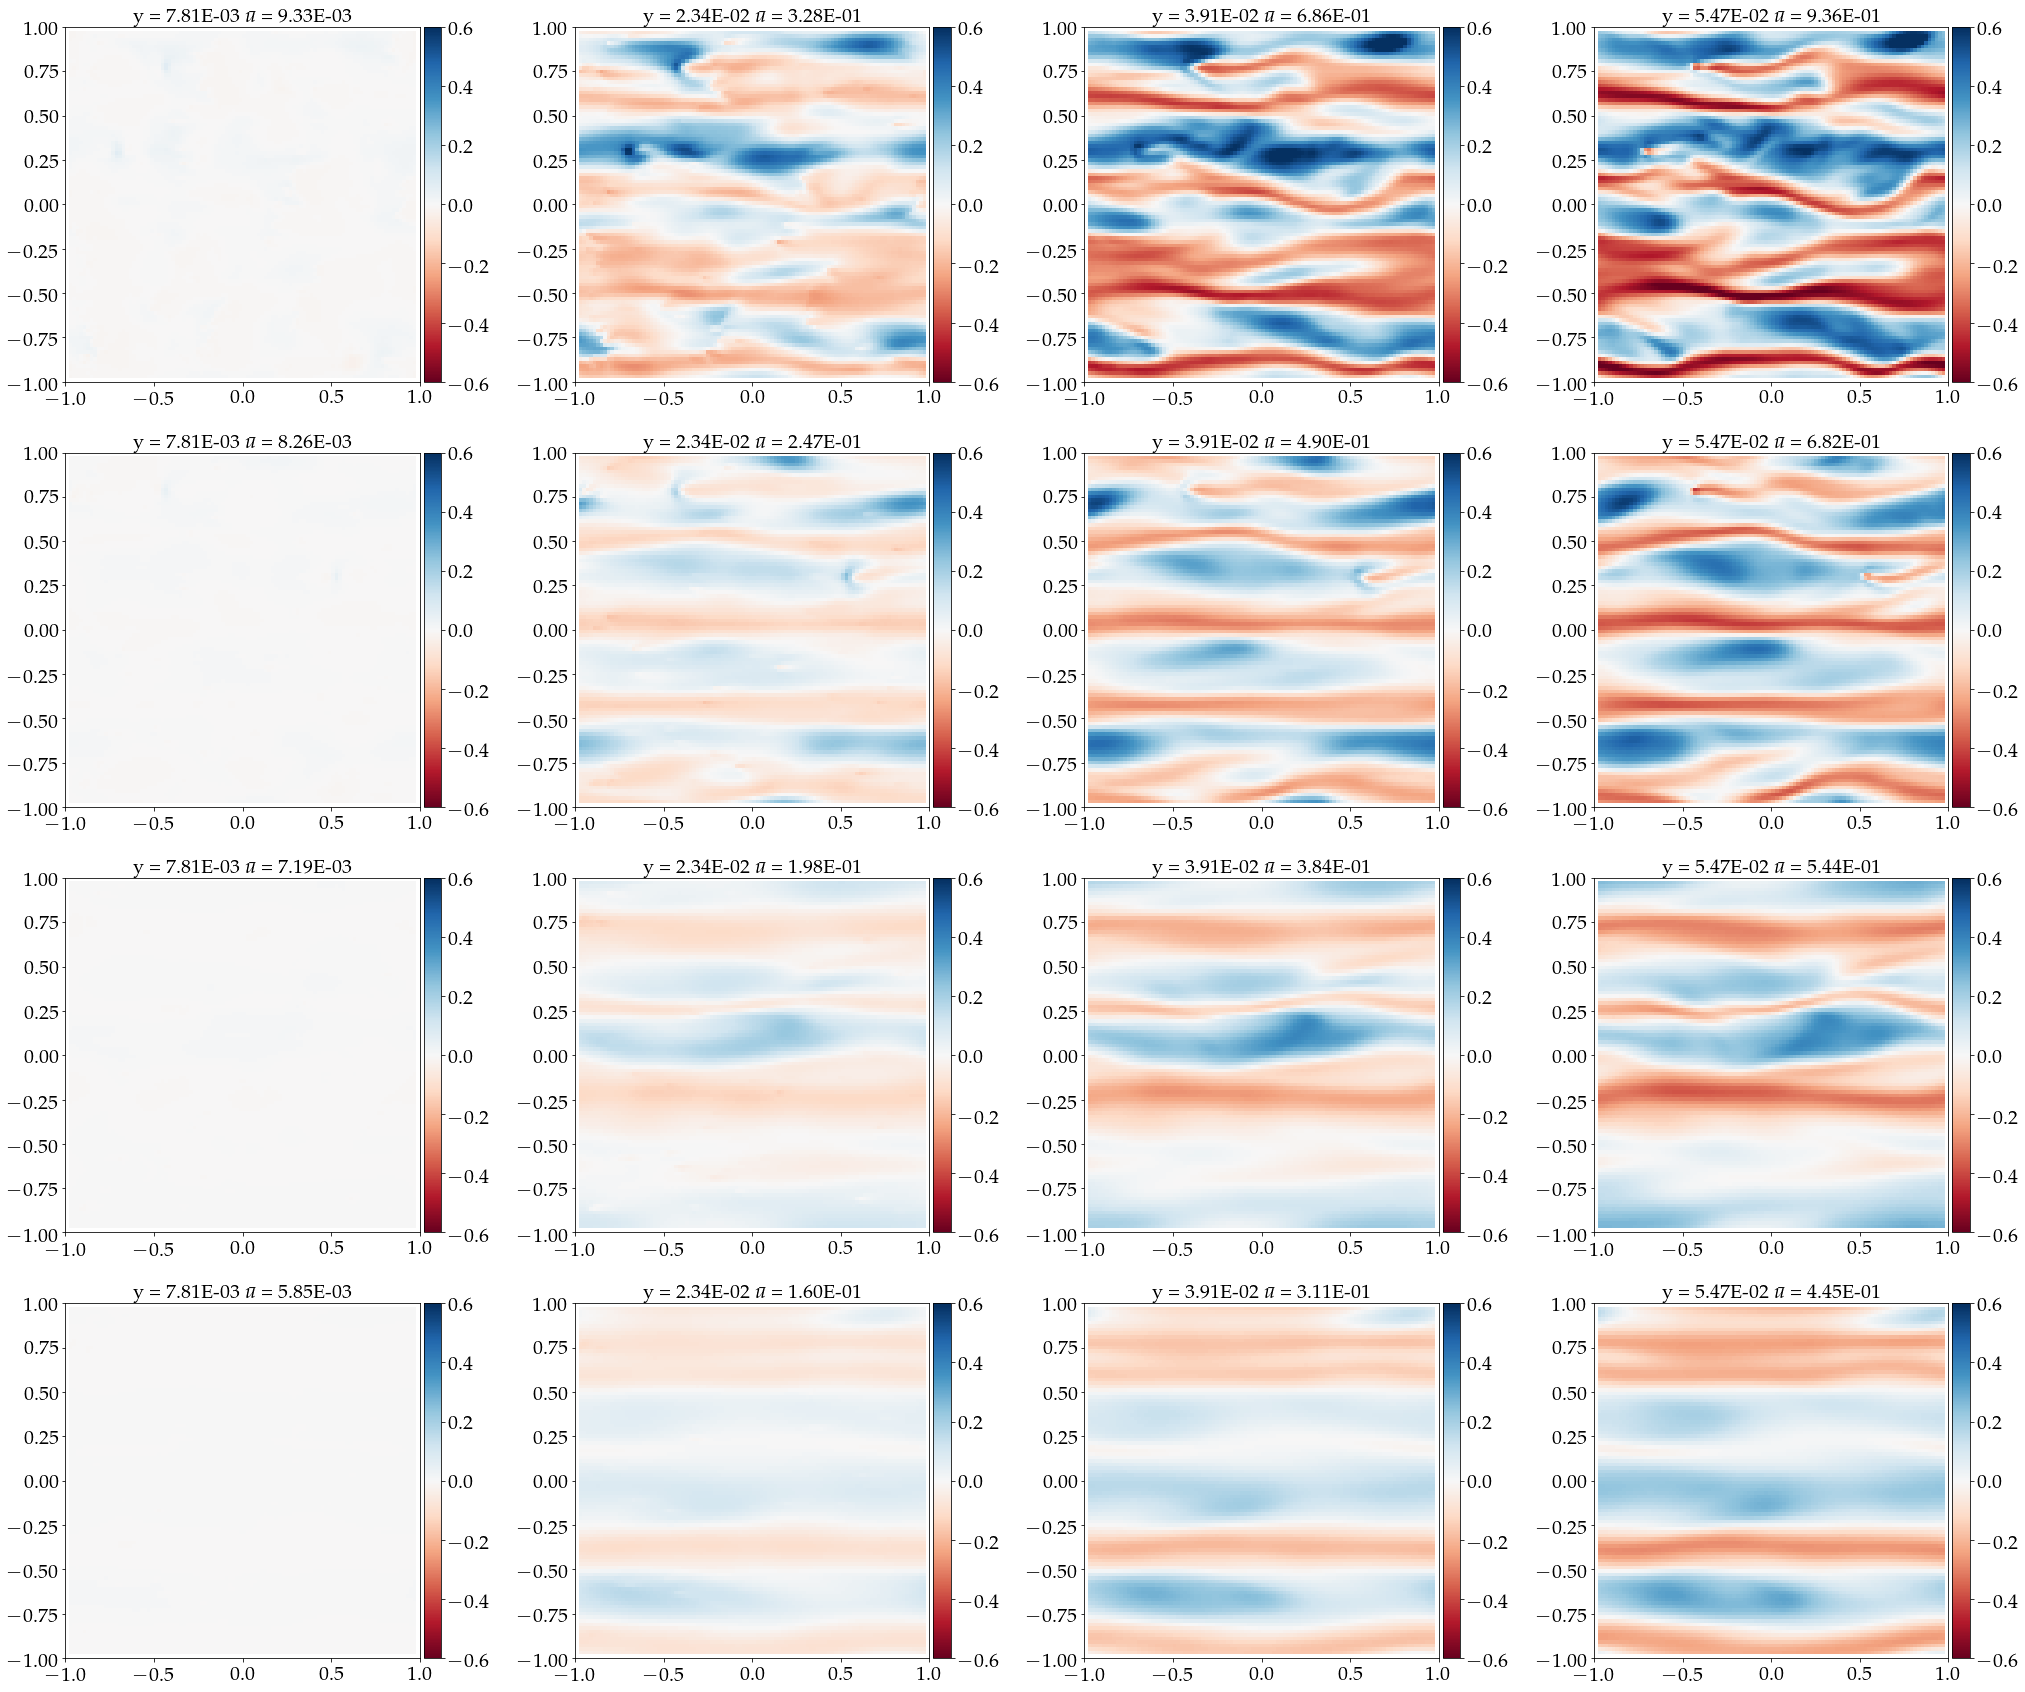

In [5]:
# Test plotting fluctuation
# Compare the time evolution
os.chdir('/home/jiarong/research/projects/turbulence/preliminary_cluster/test2_stopforcing')
grid = (4, 4)
fig1, ax1 = plt.subplots(ncols=grid[1], nrows=grid[0], figsize = [35,30])
ax = ax1.flatten()

line = 0
for j in tqdm(range(140, 180, 10)):
    filename = './field_direct%g' % j
    field = readin(filename)
    field = field.sort_values(by = ['y'])
    slicer = Slicing(field, dimension = 3)
    slicer.get_grid_set('y')
    y_set = slicer.grid_set
    for i, y in enumerate(y_set):
        if (i<4) :
            slicer.slice_plot(ax[i+line], 'y', y, header = 'u.x', fluc = True, fixedrange = [-0.6, 0.6], plotscatter = False)
            (aver,fluc,number) = slicer.statistics('y', y, header = 'u.x')
            ax[i+line].set_title('y = %1.2E' %y + r'   $\bar{u}$ = %1.2E' %aver)
    line +=4


Text(0.5, 1.0, 'Averaged Velocity Profile')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


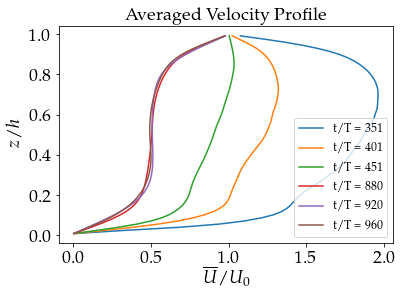

In [29]:
# Plot averaged profile
def get_yset(data):
    sample = data.drop_duplicates('y')
    y_set = sample.loc[sample.y > 0].y
    return y_set

os.chdir('/home/jiarong/research/projects/turbulence/preliminary_cluster/stopforcing')
ts = [140, 160, 180]
for i,t in enumerate(ts):
    filename = './field_direct%g' % t
    field = readin(filename)
    field = field.sort_values(by = ['y'])
    slicer = Slicing(field, dimension = 3)
    y_pos = get_yset(field)
    ux_aver = np.zeros(len(y_pos))
    for j, y in enumerate(y_pos):
        ux_aver[j], fluc, number = slicer.statistics('y', y, header = 'u.x')
    # Dure to previous wrong way of scaling the time
    plt.plot(ux_aver, y_pos, label = "t/T = %.0f" %(t*(2*3.14)**0.5))
    
# os.chdir('/home/jiarong/research/projects/turbulence/preliminary_cluster/stopforcing_restore')
# ts = [320, 325, 330, 335]
    
os.chdir('/home/jiarong/research/projects/turbulence/preliminary_cluster/stopforcing_restore_second')
ts = np.arange(880, 1000, 40)
for i,t in enumerate(ts):
    filename = './field_direct%g' % t
    field = readin(filename)
    field = field.sort_values(by = ['y'])
    slicer = Slicing(field, dimension = 3)
    y_pos = get_yset(field)
    ux_aver = np.zeros(len(y_pos))
    for j, y in enumerate(y_pos):
        ux_aver[j], fluc, number = slicer.statistics('y', y, header = 'u.x')
    # Dure to previous wrong way of scaling the time
#     plt.plot(ux_aver, y_pos, label = "t = %.2f" %(t*(2*3.14)**0.5))
    plt.plot(ux_aver, y_pos, label = "t/T = %g" %(t))
plt.legend(fontsize = 12)
plt.xlabel(r'$\overline{U}/U_{0}$')
plt.ylabel(r'$z/h$')
plt.title('Averaged Velocity Profile')

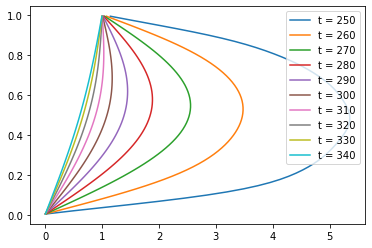

In [6]:
os.chdir('/home/jiarong/research/projects/turbulence/preliminary_cluster/RE_compare/RE4000start10end250')
ts = np.arange(250, 350, 10)
def get_yset(data):
    sample = data.drop_duplicates('y')
    y_set = sample.loc[sample.y > 0].y
    return y_set
for i,t in enumerate(ts):
    filename = './field_direct%g' % t
    field = readin(filename)
    field = field.sort_values(by = ['y'])
    slicer = Slicing(field, dimension = 3)
    y_pos = get_yset(field)
    ux_aver = np.zeros(len(y_pos))
    for j, y in enumerate(y_pos):
        ux_aver[j], fluc, number = slicer.statistics('y', y, header = 'u.x')
    plt.plot(ux_aver, y_pos, label = "t = %g" %t)
plt.legend()

In [7]:
1/2**6

0.015625

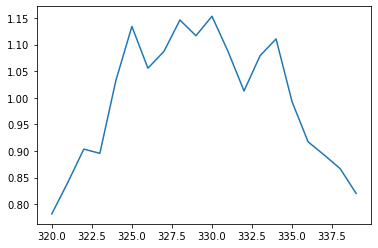

In [4]:
# A integral quantity u'
def get_yset(data):
    sample = data.drop_duplicates('y')
    y_set = sample.loc[sample.y > 0].y
    return y_set
# log kinetic energy (not multiplied by volume)
ts = np.arange(320,340)
ke = np.zeros(len(ts))
for i,t in enumerate(ts):
    filename = './field_direct%g' % t
    field = readin(filename)
    field = field.sort_values(by = ['y'])
    slicer = SlicingInterp(field, dimension = 3)
    y_pos = get_yset(field)
    ux_aver = np.zeros(len(y_pos))
    for j, y in enumerate(y_pos):
        ux_aver[j], ke_slice, number = slicer.average('y', y, 1e-2, 'u.x')
        ke[i] += ke_slice
plt.plot(ts, ke)

Text(0.5, 1, 'U_x contour at z = 0.5')

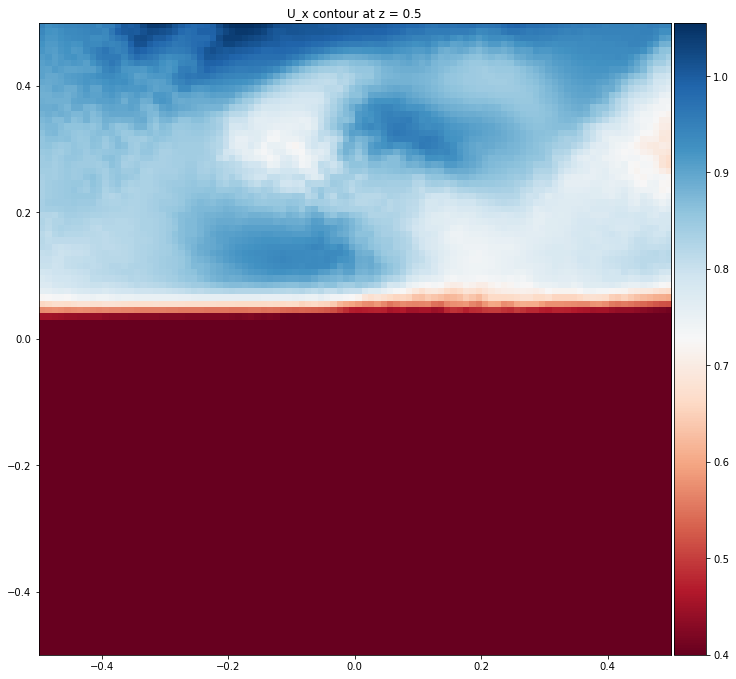

In [3]:

os.chdir('/home/jiarong/research/turbulence/preliminary_cluster/test2_stopforcing')
# pickle_in = open("field.pickle","rb")
# field = pickle.load(pickle_in)
filename = './field_direct%g' % 180
field = pd.read_table(filename, delimiter = ',')
slicer = SlicingInterp(field, dimension = 3)
field_2D = slicer.basic('z', 0.5, 1e-2, 'u.x')
# Contour plot function
from visualization import contour
fig = plt.figure(figsize = [10, 10])
ax = fig.gca()
fig.tight_layout(h_pad=1)
contour(field_2D, 'u.x', ax, fieldmin = 0.4)
ax.set_title('U_x contour at z = 0.5')

In [ ]:
# Take slice

Each plane has at least 131072 points!
Each plane has at least 16384 points!
Each plane has at least 16384 points!
Each plane has at least 16327 points!
Each plane has at least 16255 points!
Each plane has at least 15601 points!
Each plane has at least 16300 points!


(0, 1)

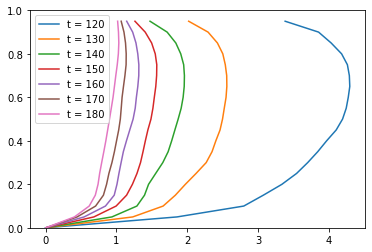

In [4]:
ts = np.arange(120,190,10)
# ts = [120, 121, 122, 140, 141, 142]
for i,t in enumerate(ts):
    filename = './field_direct%g' % t
    field = pd.read_table(filename, delimiter = ',')
    slicer = SlicingInterp(field, dimension = 3)
    y_pos = np.linspace(0, 1, 20, endpoint=False)
    ux_aver = np.zeros(len(y_pos))
    sample_size = np.zeros(len(y_pos))
    for j, y in enumerate(y_pos):
        (ux_aver[j], sample_size[j])  = slicer.average('y', y, 1e-2, 'u.x')
    plt.plot(ux_aver, y_pos, label = "t = %g" %t)
    print("Each plane has at least %g points!" % sample_size.min())
    
# field = field.iloc[1:100]
# pickle_out = open("field.pickle","wb")
# pickle.dump(field, pickle_out)
# pickle_out.close
plt.legend()
plt.ylim([0, 1])

[32768. 16384. 16384. 16375. 16378. 32748. 16375. 16372. 16375. 16372.
 32712. 16360. 16360. 16360. 16342. 32736. 16375. 16381. 16378. 16300.]
[32768. 16384. 16384. 16384. 16381. 32740. 16378. 16369. 16363. 16369.
 32720. 16360. 16300. 16354. 16321. 32676. 16369. 16369. 16375. 16336.]
[32768. 16384. 16384. 16384. 16381. 32748. 16372. 16381. 16378. 16366.
 32720. 16351. 16315. 16315. 16351. 32712. 16384. 16384. 16381. 16381.]
[32768. 16384. 16384. 16381. 16372. 32684. 16342. 16357. 16366. 16372.
 32692. 16339. 16324. 16342. 16363. 32736. 16381. 16384. 16381. 16345.]


(0, 1)

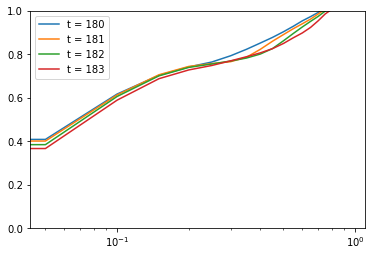

In [13]:
ts = np.arange(180,184)
# ts = [120, 121, 122, 140, 141, 142]
for i,t in enumerate(ts):
    filename = './field_direct%g' % t
    field = pd.read_table(filename, delimiter = ',')
    slicer = SlicingInterp(field, dimension = 3)
    y_pos = np.linspace(0, 1, 20, endpoint=False)
    ux_aver = np.zeros(len(y_pos))
    sample_size = np.zeros(len(y_pos))
    for j, y in enumerate(y_pos):
        (ux_aver[j], sample_size[j])  = slicer.average('y', y, 10e-3, 'u.x')
    plt.plot(y_pos, ux_aver, label = "t = %g" %t)
    print(sample_size)
    
# field = field.iloc[1:100]
# pickle_out = open("field.pickle","wb")
# pickle.dump(field, pickle_out)
# pickle_out.close
plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.ylim([0, 1])

Adding the forcing term:

In [8]:
os.chdir('/home/jiarong/research/projects/turbulence')
stats1 = pd.read_table('./RE64000LEVEL7START0END200/stats.dat', delimiter = ' ', error_bad_lines=False)
stats1.drop(stats1.tail(1).index,inplace=True)
print(stats1.size)
# stats1_restore = pd.read_table('./preliminary_cluster/stats_restore.dat', delimiter = ' ', names = ['t', 'dissipation', 'energy', 'Reynolds'], error_bad_lines=False)
# stats1_restore.drop(stats1_restore.tail(1).index,inplace=True)
# print(stats1_restore.size)
# stats1 = stats1.append(stats1_restore, ignore_index=True) # notice that the append method doesn't work in place
# print(stats1.size)
# stats2 = pd.read_table('./preliminary_cluster/stats.dat', delimiter = ' ', names = ['t', 'dissipation', 'energy', 'Reynolds'], error_bad_lines=False)
# stats2.drop(stats2.tail(1).index,inplace=True)

21344


Text(0, 0.5, 'Energy')

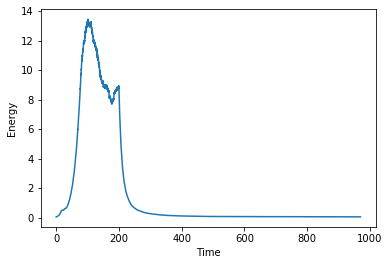

In [9]:
plt.plot(stats1.t, stats1.energy)
# plt.plot(stats1_restore.t, stats1_restore.energy)
# plt.plot(stats2.t, stats2.energy)
plt.xlabel('Time')
plt.ylabel('Energy')

Text(0, 0.5, 'Dissipation')

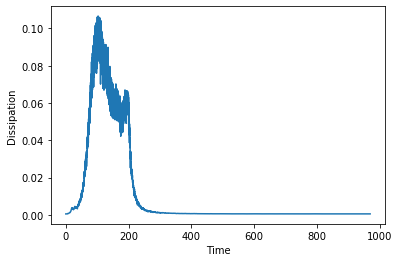

In [10]:
plt.plot(stats1.t, stats1.dissipation)
plt.xlabel('Time')
plt.ylabel('Dissipation')

Text(0, 0.5, 'Reynolds')

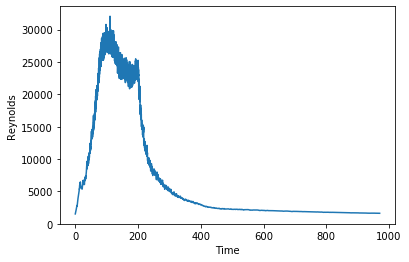

In [11]:
plt.plot(stats1.t, stats1.Reynolds)
plt.xlabel('Time')
plt.ylabel('Reynolds')